<a href="https://colab.research.google.com/github/MEnisSen/Simple_HDMR/blob/main/SimpleHDMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
H_shape = (2, 4, 3)

In [3]:
H = np.arange(1, H_shape[0] * H_shape[1] * H_shape[2] + 1).reshape(H_shape)

w_1 = np.array(H.shape[1]*[1])/H.shape[1]
w_2 = np.array(H.shape[2]*[1])/H.shape[2]
w_3 = np.array(H.shape[0]*[1])/H.shape[0]

s_1 = np.array(H_shape[1] * [1]).reshape(1, -1, 1)
s_2 = np.array(H_shape[2] * [1]).reshape(1, 1, -1)
s_3 = np.array(H_shape[0] * [1]).reshape(-1, 1, 1)

In [4]:
print("H :\n", H)
print("\nw_1 :", w_1, "\nw_2 :", w_2, "\nw_3 :", w_3)

H :
 [[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]
  [19 20 21]
  [22 23 24]]]

w_1 : [0.25 0.25 0.25 0.25] 
w_2 : [0.33333333 0.33333333 0.33333333] 
w_3 : [0.5 0.5]


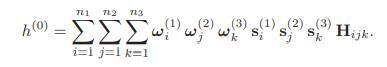

In [5]:
h_0 = 0

for i in range(len(w_1)):
  for j in range(len(w_2)):
    for k in range(len(w_3)):
      h_0 += w_1[i] * w_2[j] * w_3[k] * H[k,i,j]

print(h_0)

12.5


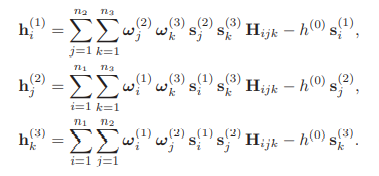

In [6]:
# ROWS
h_1 = np.array(H_shape[1] * [0.])

for j in range(len(w_2)):
  for k in range(len(w_3)):
    h_1 += w_2[j] * w_3[k] * H[k,:,j]

h_1 -= h_0 * np.array(H_shape[1] * [1])

# COLUMNS
h_2 = np.array(H_shape[2] * [0.])

for i in range(len(w_1)):
  for k in range(len(w_3)):
    h_2 += w_1[i] * w_3[k] * H[k,i,:]

h_2 -= h_0 * np.array(H_shape[2] * [1])

# BANDS
h_3 = np.array(H_shape[0] * [0.])

for i in range(len(w_1)):
  for j in range(len(w_2)):
    h_3 += w_1[i] * w_2[j] * H[:,i,j]

h_3 -= h_0 * np.array(H_shape[0] * [1])

print(h_1, h_2, h_3)

[-4.5 -1.5  1.5  4.5] [-1.  0.  1.] [-6.  6.]


In [7]:
h_1 = h_1.reshape(1, -1, 1)
h_2 = h_2.reshape(1, 1, -1)
h_3 = h_3.reshape(-1, 1, 1)

In [8]:
# H12
h_12 = np.zeros((1, H_shape[1], H_shape[2]))

for k in range(len(w_3)):
  h_12 += w_3[k] * H[k,:,:]

h_12 -= h_0 + np.tensordot(h_1, s_2, axes=([0,2],[0,1])) + np.tensordot(s_1, h_2, axes=([0,2],[0,1]))

# H13
h_13 = np.zeros((H_shape[0], H_shape[1]))

for j in range(len(w_2)):
  h_13 += w_2[j] * H[:,:,j]

h_13 = np.expand_dims(h_13, axis=2)
h_13 -= h_0 + np.expand_dims(np.tensordot(s_3, h_1, axes=([1,2],[0,2])), axis=2) + np.expand_dims(np.tensordot(h_3, s_1, axes=([1,2],[0,2])), axis=2)

# H23
h_23 = np.zeros((H_shape[0], H_shape[2]))

for i in range(len(w_1)):
  h_23 += w_1[i] * H[:,i,:]

h_23 = np.expand_dims(h_23, axis=1)
h_23 -= h_0 + np.expand_dims(np.tensordot(s_3, h_2, axes=([1,2],[0,1])), axis=1) + np.expand_dims(np.tensordot(h_3, s_2, axes=([1,2],[0,1])), axis=1)

In [36]:
h_0dim = h_0 * np.squeeze(np.tensordot(s_3, np.expand_dims(np.tensordot(s_1, s_2, axes=([0,2],[0,1])), axis=0), axes=1), axis=1)

In [64]:
s_temp = s_3.reshape(-1, 1)

h_1dim = np.tensordot(s_temp, np.expand_dims(np.tensordot(h_1, s_2, axes=([0,2],[0,1])), axis=0), axes=1) + \
         np.tensordot(s_temp, np.expand_dims(np.tensordot(s_1, h_2, axes=([0,2],[0,1])), axis=0), axes=1) + \
         np.squeeze(np.tensordot(h_3, np.expand_dims(np.tensordot(s_1, s_2, axes=([0,2],[0,1])), axis=0), axes=1), axis=1)

h_2dim = np.squeeze(np.tensordot(s_3, h_12, axes=1), axis=1) + \
         np.squeeze(np.tensordot(h_13, s_2, axes=1), axis=2) + \
         np.swapaxes(np.squeeze(np.tensordot(s_1, h_23, axes=0)), 0, 1)

In [67]:
H_new = h_0dim + h_1dim + h_2dim
print(H_new)

[[[ 1.  2.  3.]
  [ 4.  5.  6.]
  [ 7.  8.  9.]
  [10. 11. 12.]]

 [[13. 14. 15.]
  [16. 17. 18.]
  [19. 20. 21.]
  [22. 23. 24.]]]
